<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/multivariate_regression_basics_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Setup**

You can run this notebook locally. To do so you must install execute one of the following (whichever works best on your system). And, You don't need to clone the Library!!


```
!pip3 install jax jaxlib seaborn plotly statsmodels  
```
or

```
!python -m install jax jaxlib seaborn plotly statsmodels  
```

### **Clone Library**

In [128]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [129]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial

### **Read In Data Set**

In [130]:
df = pd.read_csv('/content/business-analytics/datasets/CASchools.csv')
df['students_per_teacher'] = df['students'] / df['teachers']
df.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,students_per_teacher
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329


### **Task \# 1**

In [131]:
linear_model = smf.ols('math ~ students_per_teacher', data=df)
results1 = linear_model.fit()

### **Task \#2**

In [132]:
results1 = linear_model.fit()

### **Task \# 3**

In [133]:
def model(params, x):
  return params.values[0] + params.values[1]*x

### **Task \#4**

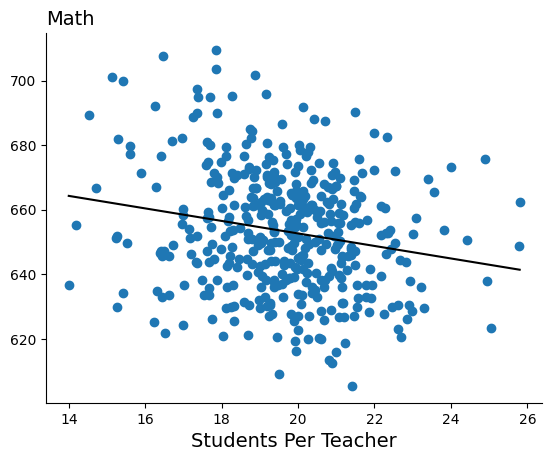

In [134]:
f = partial(model, results1.params)
xs = np.linspace(df['students_per_teacher'].min(), df['students_per_teacher'].max())
ys = list(map(f, xs))
plt.scatter(df['students_per_teacher'], df['math'])
plt.plot(xs, ys, color='black')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Students Per Teacher', size=14)
plt.title('Math', loc='left', size=14)
plt.show()

### **Task \#5**

In [135]:
linear_model = smf.ols('math ~ students_per_teacher + income', data=df)
results2 = linear_model.fit()
print(results2.params)

Intercept               632.686737
students_per_teacher     -0.347434
income                    1.794110
dtype: float64


### **Task \#6**

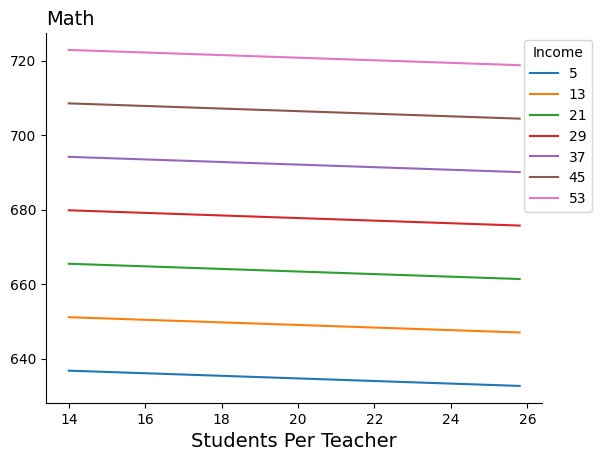

In [136]:
# Define model2 function
def model2(params, x1, x2):
    return params.values[0] + params.values[1]*x1 + params.values[2]*x2

# Generate x-values
xs = np.linspace(df['students_per_teacher'].min(), df['students_per_teacher'].max(), 100)
spt = list(range(int(df['income'].min()), int(df['income'].max()), 8))

# Plot lines for each value in 'spt'
for num in spt:
    f = partial(model2, results2.params, x2=num)  # Using partial to fix x2
    ys = list(map(f, xs))
    plt.plot(xs, ys, label=num)

# Customize plot appearance
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Students Per Teacher', size=14)
plt.title('Math', loc='left', size=14)

# Move legend to the side
plt.legend(title='Income', ncols=1, bbox_to_anchor=(.95, 1), loc='upper left')

plt.show()

### **Task \#7**

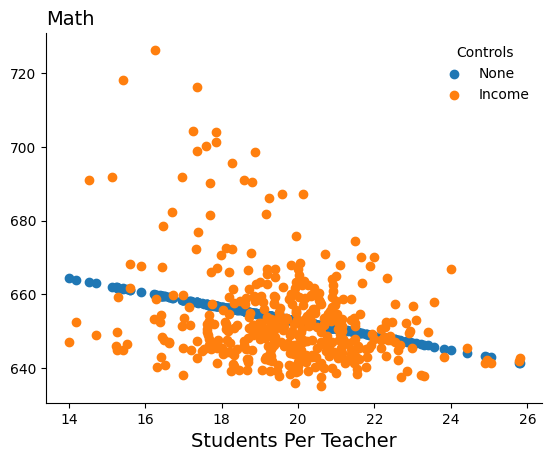

In [137]:
plt.scatter(df['students_per_teacher'], results1.fittedvalues, label='None')
plt.scatter(df['students_per_teacher'], results2.fittedvalues, label='Income')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Students Per Teacher', size=14)
plt.title('Math', loc='left', size=14)
plt.legend(title='Controls', frameon=False)
plt.show()

### **Task \#8**

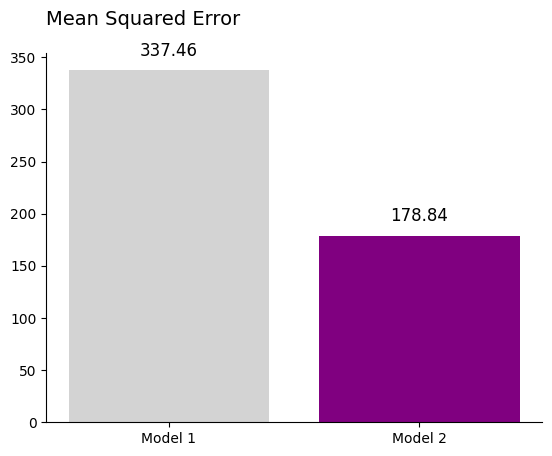

In [138]:
mse_values = [(results1.resid**2).mean(), (results2.resid**2).mean()]
model_names = ['Model 1', 'Model 2']

# Create the bar plot
plt.bar(model_names, mse_values, color=['lightgrey', 'purple'])

# Labeling and title

# Displaying exact MSE values on top of each bar
for i, v in enumerate(mse_values):
    plt.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Mean Squared Error', loc='left', size=14, pad=20)
plt.show()

### **Task \#9**

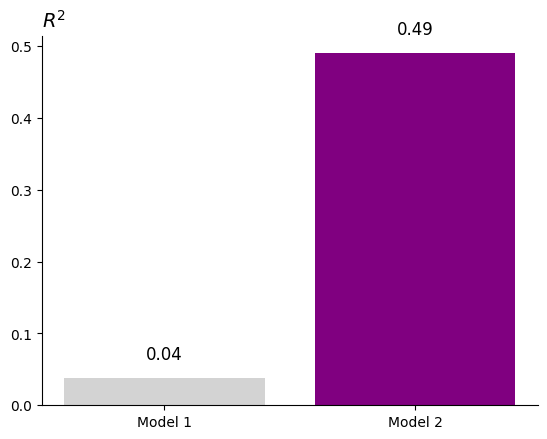

In [145]:
r2_values = [results1.rsquared, results2.rsquared]
model_names = ['Model 1', 'Model 2']

# Create the bar plot
plt.bar(model_names, r2_values, color=['lightgrey', 'purple'])

# Displaying exact MSE values on top of each bar
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title(r'$R^2$', loc='left', size=14)
plt.show()

In [140]:
df['predicted_students_per_teacher'] = smf.ols("students_per_teacher ~ income", data=df).fit().fittedvalues
df['residual_students_per_teacher'] = df['students_per_teacher'] - df['predicted_students_per_teacher']
params = smf.ols("math ~ residual_students_per_teacher", data=df).fit().params
params

,0
Intercept,653.342619
residual_students_per_teacher,-0.347434


In [141]:
fig = px.scatter(
    df,
    x='size',
    y='price',
    color='buildingStyle',  # This can be adjusted to any other variable
    title='Price',
    labels={'Size': 'Size (sq ft)'},
)

fig.update_layout(
    title={'x': 0.0, 'xanchor': 'left'},  # Title alignment to left
    xaxis=dict(title='Size',
        title_font=dict(size=14)),
    yaxis=dict(
        title='',
        tickformat=',',
        tickfont=dict(size=12)
    ),
    margin=dict(t=40, b=40, l=40, r=40)
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'district', 'school', 'county', 'grades', 'students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure', 'income', 'english', 'read', 'math', 'students_per_teacher', 'predicted_students_per_teacher', 'residual_students_per_teacher'] but received: size

Creating a Linear Model

In this notebook, we are going to fit the following model to our mortgage dataset.


$$\text{Loan Amount}_i = \beta_0 + \beta_1 \text{Applicant Income}_i +  \text{Loan Type}_i + ɛ_i$$

To create a linear model in Python we have to specify the two components.

- Relationship of Interest
- DataFrame which contains the variables



**The relationship of interest**
  - What is the outcome/dependent variable
  - What are the independent variables/ Control Variables / Features
  - We can do so in Python by create a string with the outcome to the left of a tilde sign and the independent variables (separated by `+`)  to the right as in:

  ```Dependent ~ Independent1 + Independent2```

  - If an independent variable is a categorical variable, then we write `c(Independent)` as in:
  
  ```Dependent ~ Independent1 + C(Independent2)```

We can create a **Linear Model** in Python by passing the relationship of interest and the dataframe as inputs to `smf.ols` as in

```linear_model = smf.ols('Dependent ~ Independent1 + C(Independent2)', data = df)```


### **Task \#1**: <font color='navy'>Create a Linear Regression Model in Python where Loan Amount is the outcome variable and Applicant Income and Loan Type are the control variables. Save this as a variable `linear_model`</font>

In [ ]:
linear_model = smf.ols('price ~ size + C(rooms)', data=df)


### **Task \#2**: <font color='navy'>Fit the linear model (estimate the parameters) and save the it as a variable named `results1`</font>

In [ ]:
results1 = linear_model.fit()

### **Task \#3**: <font color='navy'>What surpises you about the estimated parameters? Specifically, compared to the `pd.unique(df['loan_type_name'])`, which parameters appears to not have been estimated? </font>

In [ ]:
results1.params

Visulaizing Model Fit

Python provides us with an easy way to see our models predictions on the dataset that we used to fit the model. Given that we named the variable corresponding to the output of `linear_model.fit()`, we can access the predicted values via `reg.fittedvalues`. Create a scatter plot of Size and Price, and overlay a plot of Size and the fitted values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range for the 'size' variable
size_range = np.linspace(df['size'].min(), df['size'].max(), 100)

# Get the intercept from the model
intercept = results1.params['Intercept']
slope = results1.params['size']

# Generate predictions for each room category, using the fitted coefficients
predictions = {}
for room in range(2, 12):  # Loop over rooms 2 to 11
    room_effect = results1.params.get(f'C(rooms)[T.{room}]', 0)  # Use 0 if not found (for reference category)
    predictions[room] = intercept + room_effect + slope * size_range

# Plot each category
plt.figure(figsize=(10, 6))
for room, prediction in predictions.items():
    plt.plot(size_range, prediction, label=f'Rooms = {room}')

# Include the reference category (rooms = 1) as a baseline
baseline_prediction = intercept + slope * size_range
plt.plot(size_range, baseline_prediction, label='Rooms = 1 (Reference)', linestyle='--', color='black')

# Customize plot
plt.xlabel('Size', size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Price', loc='left')
plt.legend(title='Room Count')
plt.show()

\#4. Showing Results

If you fit the model correctly, then you can adjust the following code to show both the fitted parameters and the overall results.

- We're using an f-string within a `print` statement to show the fitted parameters. Pass in `reg.params.values` within the curly braces.

- To show the results in a table-like format (one that you could use to show your work in a final project), pass in `reg` with the `[]` argument of `summary_col`

In [ ]:
### PRINT FITTED PARAMETERS
print(f"Fitted Parameters: {### FILL THIS IN###}")

### PRESENT RESULTS
print(summary_col([### FILL THIS IN###],
                  stars=True,
                  float_format='%0.2f'))

\#5. Understanding what a linear model captures:

Using the methods that we previouslly learned in pandas, `df[var1].cov(df[var2])`, `df[var2].var()`, divide the covariance of Price and Size by the variance of Size. How does this relate to the slope parameters?

\#6. Using the Model to Generate Predictions

Having fit a linear model to the data, we have a pair of estimated values for the parameters. We can now create a function `model(params, x)` which can take in the estimated parameters and some value of size of the house and output our prediction. Implement this function

\#8. Mean Residual

In this notebook, we're fitting a linear model to our data. As the above figures highlight, a linear model will not perfectly predict Price for a given Size of the house. We refer to this "prediction error" as the residual.

Compute the mean residual.

$$r_i(\beta_0, \beta_1) = y_i - (\beta_0 + \beta_1 x_i)$$

\#9. Visualing the Distribution of the Residual

Using `reg.resid`, create a histogram which captures the distribution of the residuals. Then create a scatter plot of Size and the residuals

Use `.resid` to create a scatter plot of Size and the Residual Values



In [ ]:
### ADD HISTOGRAM HERE
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Residuls', size=14)
plt.title('Density', loc='left', size=14)
plt.show()

### ADD SCATTER PLOT HERE
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Residuals', loc='left', size=14)
plt.show()

\#10. Let's explore the relationship between Size and the Residual numerically.

(A) Create a new column in your DataFrame that is equal to the residuals.

(B) Regress the residual on Size.

Do the results surprise you?


\#11. Visualizing Uncertainty

We can use **new** plotting libraries, like Seaborn, for more advanced plotting techniques such as capturing the uncertainty in our estimate. Fill in the following value for `x` and `y` to show a scatter plot of size and price and a line of best fit with uncertainty estimates.

In [ ]:
sb.regplot(x = ###FILL THIS IN###, y = ###FILL THIS IN###, data = df,
line_kws = {'color': 'red'})
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.ylabel('')
plt.show()

\#12. Challenge

Read in the WNBA dataset as a new dataframe and adjust the seaborn code above to visualize the relationship between Assists and Price. What is the read line (uncertainty) meant to capture?